In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import Preparation as Pn

Using CAMB 1.0.4 installed at /Users/cheng/anaconda3/lib/python3.7/site-packages/camb-1.0.4-py3.7.egg/camb
Linear Power Spectrum at z=0 expanded. The number of expansion terms is: 201
Number of interpolation sampling points are: 1000
Modified arguments are in the interval of [ 3.085441052221741e-05 , 1000.2 ]
Creating the modified functions...
Function tools activated.


In [12]:
#Test how fast will these functions be
l1 = 2
z1 = 1.0
z2 = 1.0
sigma1 = 0.05
sigma2 = 0.05
chi_avg1 = Pn.default_cosmo.chi(z1)
chi_avg2 = Pn.default_cosmo.chi(z2)
chi_sigma1 = sigma1/Pn.default_cosmo.HH(z1)
chi_sigma2 = sigma2/Pn.default_cosmo.HH(z2)
chi_min = chi_avg1-5*chi_sigma1
chi_max = chi_avg2+5*chi_sigma2
chi_array = np.array([chi_min + i*(chi_max-chi_min)/25 for i in range(25)])
delta_chi_array = np.array(list(10**np.array([-1+(np.log10(chi_max-chi_min)+1)/100*i for i in range(101)])))

In [43]:
chi_chi, dchi_dchi = np.meshgrid(chi_array, delta_chi_array)
xx = dchi_dchi*l1/(chi_chi+0.5*dchi_dchi)
sum = 0
for i in range(99):
    func_r = Pn.func_real_list[i]
    func_i = Pn.func_imag_list[i]
    sum += (func_r(xx)+1j*func_i(xx))*dchi_dchi**(-Pn.nu_n_array[int(Pn.Nmax/2)+1+i]-1)


In [44]:
import sys
D1_D1 = np.array([[Pn.default_cosmo.Dg_norm(chi-0.5*dchi) for chi in chi_array] for dchi in delta_chi_array])
D2_D2 = np.array([[Pn.default_cosmo.Dg_norm(chi+0.5*dchi) for chi in chi_array] for dchi in delta_chi_array])

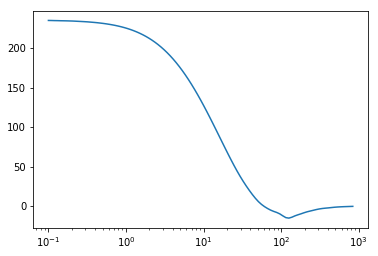

In [46]:
C_grid = 2*D1_D1*D2_D2*sum
plt.semilogx(delta_chi_array, C_grid[:,12])

### In order to speed up the evaluation of expansion involving modifed bessel functions of the second kind, we try to prepcalculate the interpolation form of the following term, given the ith expansion term.

\begin{equation}
C(\ell, \chi, \delta\chi) = \sum \alpha_i \frac{(2\tilde{\ell}/\delta\chi)^{\frac{1}{2}+\frac{\nu_i}{2}}}{\sqrt{\pi}\Gamma(-\frac{\nu_i}{2})} K_{-\frac{1}{2}-\frac{\nu_i}{2}}(\delta\chi\tilde\ell)
\end{equation}

we change the form of r.h.s of the above equation as:

\begin{equation}
\sum \alpha_i \frac{(2\tilde{\ell}\delta\chi)^{\frac{1}{2}+\frac{\nu_i}{2}}}{\sqrt{\pi}\Gamma(-\frac{\nu_i}{2})} K_{-\frac{1}{2}-\frac{\nu_i}{2}}(\delta\chi\tilde\ell) \times \delta\chi^{-\nu_i-1}
\end{equation}

The time consuming part of this equation is the evaluation of the two special functions. If we consider $\delta\chi\tilde\ell$ as an argument, and have evaluated the relevant function via interpolation, then we would be able to vastly speed up all the calculation.

The problem now are two folds:
1. we need to select carefully about the range of $\delta\chi\tilde\ell$, which is $\delta\chi\ell/(\chi+0.5*\delta\chi)$.
2. we need to check whether the function is smooth enough for a interpolation to describe.

In [14]:
#Here we try to test the smoothness of the modified function
#ell is basically within the range of 2-500, while the possible chi and delta chi range varies a lot. 
#Basically, we could consider the minimum of dchi*l/(chi+0.5dchi) as 2/(0.5+chi(10)/0.1), which we could be able to consider up to z=10
#While the maximum could be 500/(0.5)
#Therefore, roughly,  we choose these two quantities as the fixed interval for a test, while varying the number of samples
#import Preparation as Pn
df_cosmo = Pn.default_cosmo
N_sample = 1000

x_min = 2/(0.5+df_cosmo.chi(10)/0.1)
x_max = 500.1/(0.5)
x_test = 10** np.array([np.log10(x_min) + np.log10(x_max/x_min)/N_sample*i for i in range(N_sample)])

#Lets try to evaluate the whole parameter space
ind_array = [101 + i for i in range(100)]

func_real_sample = []
func_imag_sample = []
for ind in ind_array:
    c_i = Pn.c_n_array[ind]
    nu_i = Pn.nu_n_array[ind]
    func_real, func_imag= Pn.modified(x_test, nu_i, c_i)
    func_real_sample.append(func_real)
    func_imag_sample.append(func_imag)

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


Text(0.5, 0, '$\\delta\\chi\\tilde\\ell$')

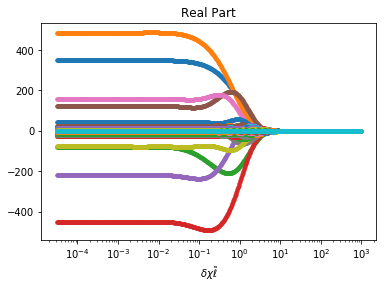

In [15]:
print(ind_array)
for i in range(len(ind_array)):
    plt.semilogx(x_test, func_real_sample[i], '.' )

plt.title('Real Part')
plt.xlabel(r'$\delta\chi\tilde\ell$')

Text(0.5, 0, '$\\delta\\chi\\tilde\\ell$')

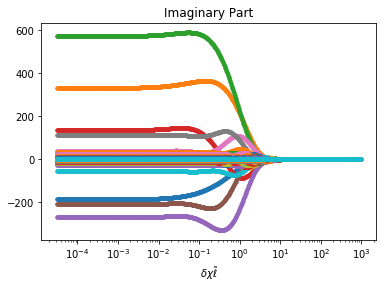

In [16]:
for i in range(len(ind_array)):
    plt.semilogx(x_test, func_imag_sample[i], '.' )

plt.title('Imaginary Part')
plt.xlabel(r'$\delta\chi\tilde\ell$')

In [22]:
import time

def mesh_grid_generator(z1, z2, sigma1, sigma2, Nchi, Ndchi):
    '''
    Params:
    z1, z2: the redshifts of our objects
    sigma1, sigma2: the dispersion of our window function
    Nchi, Ndchi: fidicually chosen length of the sampling array

    Return:
    mesh-grids of chi_chi, dchi_dchi, 
    and, growth factors D1_D1, D2_D2.
    '''
    chi_avg1 = Pn.default_cosmo.chi(z1)
    chi_avg2 = Pn.default_cosmo.chi(z2)
    chi_sigma1 = sigma1/Pn.default_cosmo.HH(z1)
    chi_sigma2 = sigma2/Pn.default_cosmo.HH(z2)
    chi_min = max(chi_avg1-4*chi_sigma1, 0.5)
    chi_max = min(chi_avg2+4*chi_sigma2, Pn.default_cosmo.chi(10.0))
    chi_array = np.array([chi_min + i*(chi_max-chi_min)/Nchi for i in range(Nchi)])
    dchi_array = np.array(list(-10**np.array([-1+(np.log10(chi_max-chi_min)+1)/Ndchi*i for i in range(Ndchi+1)])[::-1])\
        +list(10**np.array([-1+(np.log10(chi_max-chi_min)+1)/Ndchi*i for i in range(Ndchi+1)])))
    #Create the sample grid
    D1_D1 = np.array([[Pn.default_cosmo.Dg_norm(chi-0.5*dchi) for chi in chi_array] for dchi in dchi_array])
    D2_D2 = np.array([[Pn.default_cosmo.Dg_norm(chi+0.5*dchi) for chi in chi_array] for dchi in dchi_array])
    chi_chi, dchi_dchi = np.meshgrid(chi_array,dchi_array)
    grid1 = chi_chi-0.5*dchi_dchi
    grid2 = chi_chi+0.5*dchi_dchi
    Wg1_Wg1 = Pn.Wg(grid1, chi_avg1, chi_sigma1)
    Wg2_Wg2 = Pn.Wg(grid2, chi_avg2, chi_sigma2)

    return chi_chi, dchi_dchi, D1_D1, D2_D2, Wg1_Wg1, Wg2_Wg2

def power_calc_sampling(l, n, chi_chi, dchi_dchi, D1_D1, D2_D2, Wg1_Wg1, Wg2_Wg2):
    '''
    Params:
    l: The multiple
    n: The order of our approximation, usually order 0 will be good enough
    chi_chi, dchi_dchi: The 2D mesh-grid of the chi (dchi) parameter. 
                        The n_row is the same as length of dchi array, 
                        while the n_columns is the same as length of chi array.
    D1_D1, D2_D2: The mesh-grid of growth factor. The same shape as chi_chi.
    Wg1_Wg1, Wg2_Wg2: The mesh-grid of several window functions.

    Return:
    The angular power spetrum at mutiple l.
    '''
    xx = dchi_dchi*l/(chi_chi+0.5*dchi_dchi)
    Cl_array_array = np.array([(Pn.func_real_list[i](np.abs(xx))+1j*Pn.func_imag_list[i](np.abs(xx)))*\
        np.abs(dchi_dchi)**(-Pn.nu_n_array[int(Pn.Nmax/2)+1+i]-1) for i in range(int(Pn.Nmax/2))])
    Cl_array = np.sum(Cl_array_array, axis=0)

    Simp_array = D1_D1*D2_D2*2*Cl_array*Wg1_Wg1*Wg2_Wg2*(dchi_dchi/chi_chi)**n/chi_chi**2
    results = Pn.simps(Pn.simps(Simp_array, chi_chi[0,:]), dchi_dchi[:,0])
    return results

def full_calc_sampling(l_array, n, z1, z2, sigma1, sigma2, Nchi, Ndchi):
    '''
    Params:
    l_array: The array of multiples we have chosen to consider
    The meaning of rest parameters could be found above

    Return:
    An list of angular power spectrum given l_array
    '''
    start1 = time.time()
    chi_chi, dchi_dchi, D1_D1, D2_D2, Wg1_Wg1, Wg2_Wg2 = mesh_grid_generator(z1, z2, sigma1, sigma2, Nchi, Ndchi)
    end1 = time.time()-start1
    print('Time for preparing mesh-grids is:', end1, 's')
    start2 = time.time()
    power_array = [power_calc_sampling(li, n, chi_chi, dchi_dchi, D1_D1, D2_D2, Wg1_Wg1, Wg2_Wg2).real for li in l_array]
    end2 = (time.time()-start2)/len(l_array)
    print('Time for calculating each l is:',end2,'s')

    return power_array


In [10]:
func_array = np.array([lambda x: np.sin(x), lambda x: np.cos(x), lambda x: x])
print(func_array[0](np.pi))
print(func_array[1](np.pi))
print(func_array[2](np.pi))

1.2246467991473532e-16
-1.0
3.141592653589793


In [24]:
l_Assassi = []
Cl_Assassi = []
Assassi_file_path = '/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705 2/Mathematica/z1_z2_1.txt'
with open(Assassi_file_path,'r') as file:
    lines = file.readlines()
    for line in lines:
        l, C = line.split(',')
        l_Assassi.append(int(l))
        Cl_Assassi.append(float(C.strip('\n')))

file.close()

In [25]:
our_l = l_Assassi
our_Cl_0_1 = full_calc_sampling(our_l, 0, 1.0, 1.0, 0.05, 0.05, 50, 100)

Time for preparing mesh-grids is: 18.881540060043335 s
Time for calculating each l is: 0.09924897187047725 s


In [126]:
def plot_compare(path_Aassassi, path_Limber, our_l, our_Cl, ymin, ymax, xmin, xmax, rescale):

    l_Assassi = []
    Cl_Assassi = []
    with open(path_Aassassi,'r') as file:
        lines = file.readlines()
        for line in lines:
            l, C = line.split(',')
            l_Assassi.append(int(l))
            Cl_Assassi.append(float(C.strip('\n')))

    file.close()

    l_limber = np.load(path_Limber)[0,:]
    Cl_limber = np.load(path_Limber)[1,:]
    plt.style.use('dark_background')
    fig = plt.figure(2)
    frame1 = fig.add_axes((.1, .4, 1.8, 1.5))   
    #plt.loglog(our_l, our_Cl_0, '*', label=r'OurApprox')
    #plt.loglog(our_l_short, our_Cl_0_finer*1e6, '+', label=r'OurApproxFiner')
    plt.loglog(np.sqrt(our_l*(our_l)), np.abs(np.array(our_Cl))*rescale, label=r'OurApprox')
    plt.loglog(l_limber, np.abs(Cl_limber)*rescale, '--', label=r'Limber')
    plt.loglog(l_Assassi, np.abs(np.array(Cl_Assassi))*rescale,'-.', label=r'AssassiApprox')
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, xmax)
    plt.legend()
    #plt.xlabel(r'$\ell$',fontsize=15)
    plt.ylabel(r'$C_{\ell}^{g}\ (\times 10^{%d})$'%np.log10(rescale), fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    frame1.set_xticklabels([])
    frame2 = fig.add_axes((.1, .1, 1.8, .3))
    plt.semilogx(our_l, (np.array(our_Cl)/Cl_Assassi-1)*100)
    plt.semilogx(our_l[:-1], (np.array(Cl_limber)/Cl_Assassi[:-1]-1)*100,'--')
    
    plt.semilogx(our_l, [0. for i in range(len(our_l))],'-.')

    plt.ylim(-2, 2)

    plt.xlabel(r'$\ell$',fontsize=15)
    plt.ylabel(r'$\rm Ratio-1\,[\%]$',fontsize=15)

### From the two plots above, we can tell that the functions are indeed smooth in log scale of $\delta\chi\tilde\ell$. And the evaluation of all 100 functions over 1000 sampling points only takes 1.5min. Therefore, it is indeed feasible to perform the following procedure.

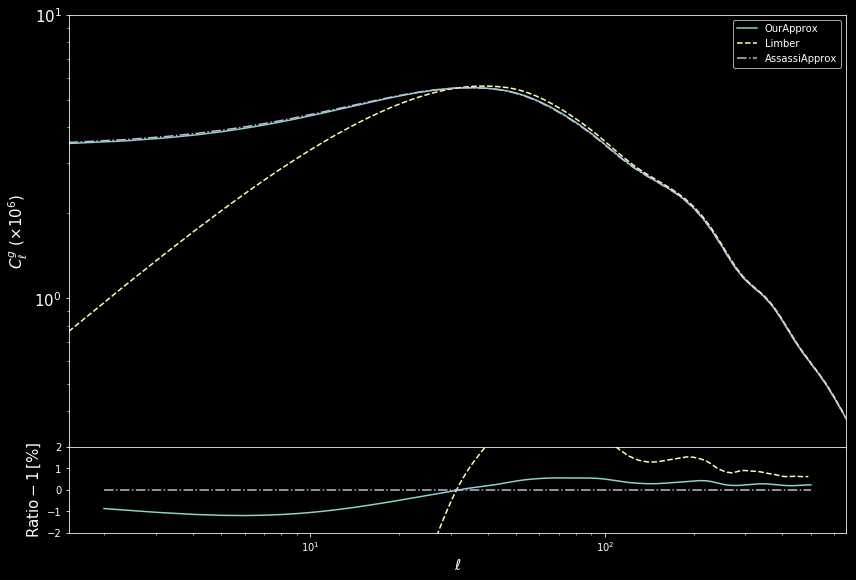

In [127]:
plot_compare('/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705 2/Mathematica/z1_z2_1.txt',\
    '/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705Python/Limber/z1_1_z2_1_005.npy', np.array(our_l), np.abs(our_Cl_0_1), 0.3, 10, 2, 500, 1e6)

In [29]:
our_Cl_0_2 = full_calc_sampling(our_l, 0, 1.0, 1.25, 0.05, 0.05, 50, 100)

Time for preparing mesh-grids is: 19.511862993240356 s
Time for calculating each l is: 0.1041125102008847 s


In [30]:
our_Cl_0_3 = full_calc_sampling(our_l, 0, 2.0, 2.0, 0.3, 0.3, 50, 100)

Time for preparing mesh-grids is: 19.283384799957275 s
Time for calculating each l is: 0.10238383485258912 s


In [36]:
our_Cl_0_4 = full_calc_sampling(our_l[:-20], 0, 2.0, 3.5, 0.3, 0.3, 50, 100)

Time for preparing mesh-grids is: 18.518076181411743 s
Time for calculating each l is: 0.0968050335635658 s


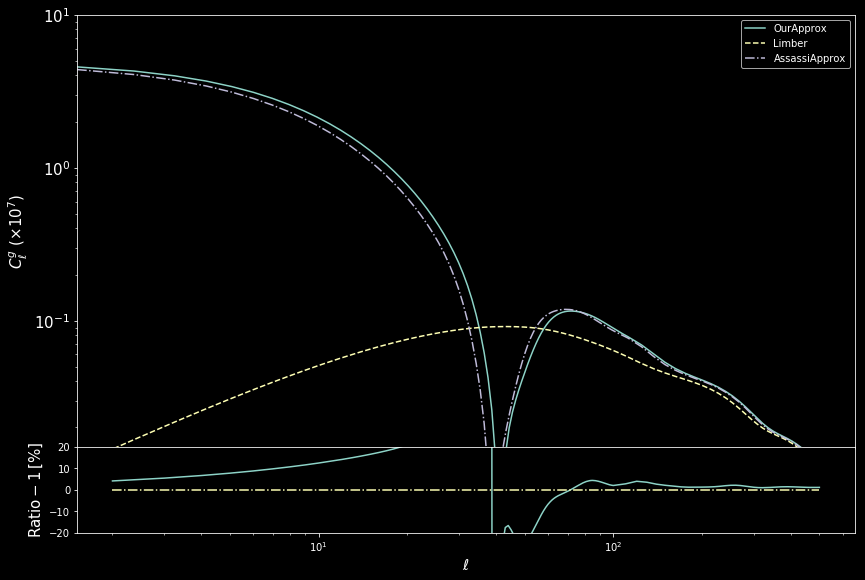

In [112]:
plot_compare('/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705 2/Mathematica/z1_1_z2_125.txt',\
    '/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705Python/Limber/z1_1_z2_125_005.npy', np.array(our_l), our_Cl_0_2, 0.015, 10, 2, 500, 1e7)

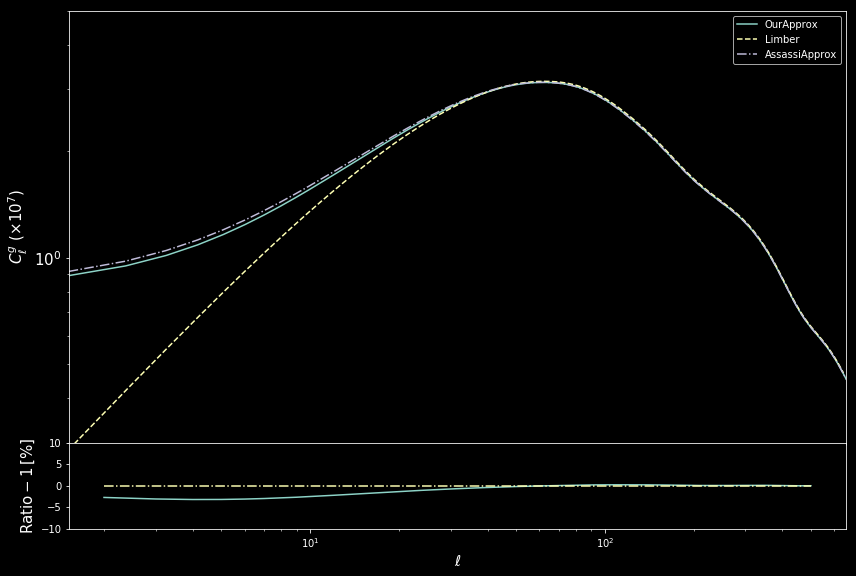

In [95]:
plot_compare('/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705 2/Mathematica/z1_2_z2_2.txt',\
    '/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705Python/Limber/z1_2_z2_2_03.npy', our_l, our_Cl_0_3, 0.3, 5, 2, 500, 1e7)


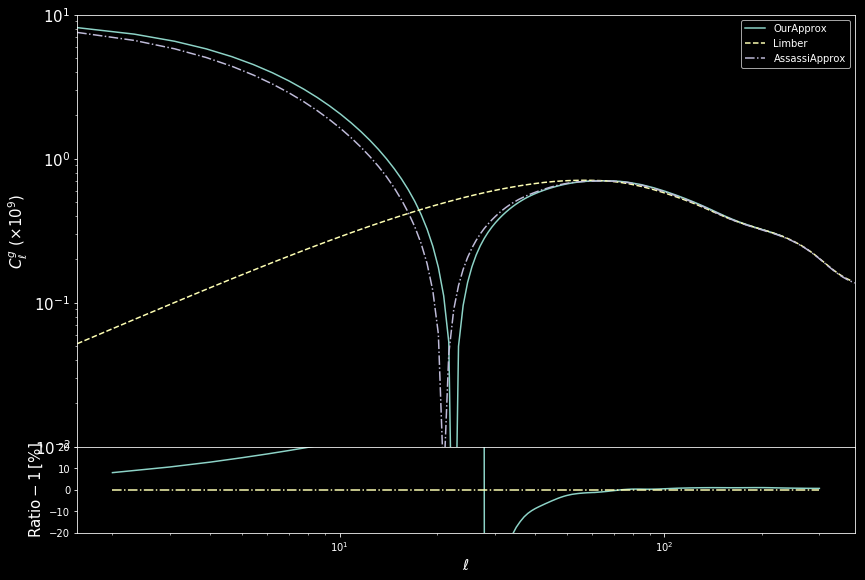

In [100]:
plot_compare('/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705 2/Mathematica/z1_2_z2_35.txt',\
    '/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705Python/Limber/z1_2_z2_35_03.npy', our_l[:-20], our_Cl_0_4, 0.01, 10, 2, 500, 1e9)

In [40]:
our_Cl_0_4_finer = full_calc_sampling(our_l[:-20], 0, 2.0, 3.5, 0.3, 0.3, 100, 100)

Time for preparing mesh-grids is: 36.359163999557495 s
Time for calculating each l is: 0.17987379907559947 s


In [133]:
#Testing new codes
import Calculation as cln

Linear Power Spectrum at z=0 expanded. The number of expansion terms is: 201


In [135]:
our_Cl_0_1_compile = cln.full_calc_sampling(our_l, 0, 1.0, 1.0, 0.05, 0.05, 50, 100, cln.c_n_array)

Time for preparing mesh-grids is: 18.873483180999756 s
Time for calculating each l is: 0.09882958844411287 s


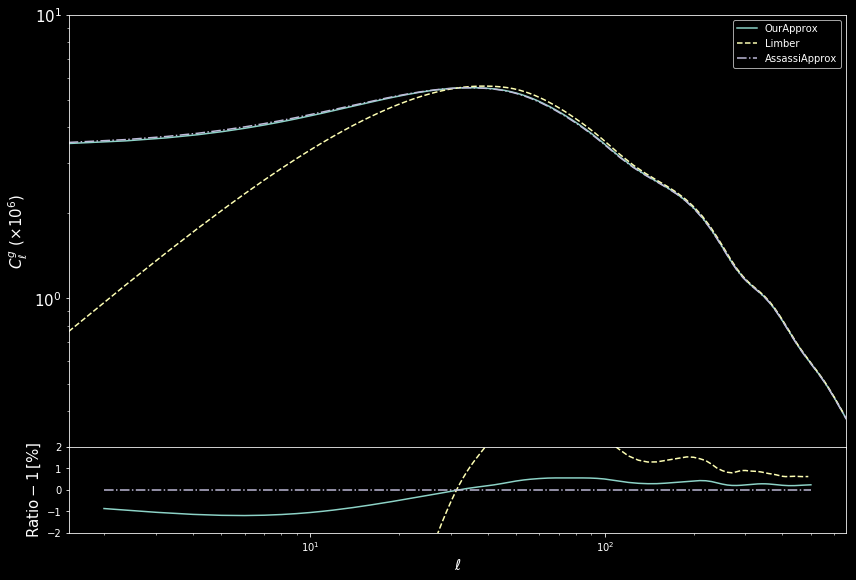

In [136]:
plot_compare('/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705 2/Mathematica/z1_z2_1.txt',\
    '/Users/cheng/Documents/Researches_at_Cambridge/Limber/1705Python/Limber/z1_1_z2_1_005.npy', np.array(our_l), np.abs(our_Cl_0_1_compile), 0.3, 10, 2, 500, 1e6)